In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/AI_Programming_Basic

/content/drive/MyDrive/Colab Notebooks/AI_Programming_Basic


In [3]:
# import sys
# sys.path.append('/calculator')

In [4]:
### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 단순회귀분석

## [Step1] 데이터 준비 - read_csv()

In [5]:
# [Step1] 데이터 준비 - read_csv()

# 열 이름 지정하지 않음(header)
df = pd.read_csv('calculator/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model year', 'origin', 'name']

In [6]:
# 데이터 살펴보기
print(df.head())
print('\n')

# IPython 디스플레이 설정 - 출력할 열의 개수 한도 조정하기
pd.set_option('display.max_columns', 5)
print(df.head())
print('\n')

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


    mpg  cylinders  ...  origin                       name
0  18.0          8  ...       1  chevrolet chevelle malibu
1  15.0          8  ...       1          buick skylark 320
2  18.0          8  ...       1         plymouth satellite
3  16.0          8  ...       1          

## [Step2] 데이터 탐색 - info, describe

In [7]:
# [Step2] 데이터 탐색 - info, describe

# 데이터 자료형 확인
print(df.info())
print('\n')

# 데이터 통계 요약정보 확인
pd.set_option('display.max_columns', 10)
print(df.describe())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000 

In [8]:
# horsepower 열의 자료형 변경(문자열 -> 숫자)
print(df['horsepower'].unique())    # hoserpower 열의 고유값 확인 == 중간에 '?' 데이터 있음 확인
print('\n')

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']




In [9]:
df['horsepower'].replace('?', np.nan, inplace=True)     # '?' 값을 nan으로 변경하고, 원본에 덮어씌움(True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)  # 누락데이터 행을 삭제
df['hoserpower'] = df['horsepower'].astype('float')     # 문자열을 실수형으로 변환

print(df.describe())
print('\n')

              mpg   cylinders  displacement       weight  acceleration  \
count  392.000000  392.000000    392.000000   392.000000    392.000000   
mean    23.445918    5.471939    194.411990  2977.584184     15.541327   
std      7.805007    1.705783    104.644004   849.402560      2.758864   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.000000    4.000000    105.000000  2225.250000     13.775000   
50%     22.750000    4.000000    151.000000  2803.500000     15.500000   
75%     29.000000    8.000000    275.750000  3614.750000     17.025000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year      origin  hoserpower  
count  392.000000  392.000000  392.000000  
mean    75.979592    1.576531  104.469388  
std      3.683737    0.805518   38.491160  
min     70.000000    1.000000   46.000000  
25%     73.000000    1.000000   75.000000  
50%     76.000000    1.000000   93.500000  
75%     79.000000    2.00

## [Step 3] 속성(feature 또는 variable) 선택

In [10]:
# 분석에 활용할 열(속성)을 선택(연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
print(ndf.head())
print('\n')

    mpg  cylinders horsepower  weight
0  18.0          8      130.0  3504.0
1  15.0          8      165.0  3693.0
2  18.0          8      150.0  3436.0
3  16.0          8      150.0  3433.0
4  17.0          8      140.0  3449.0




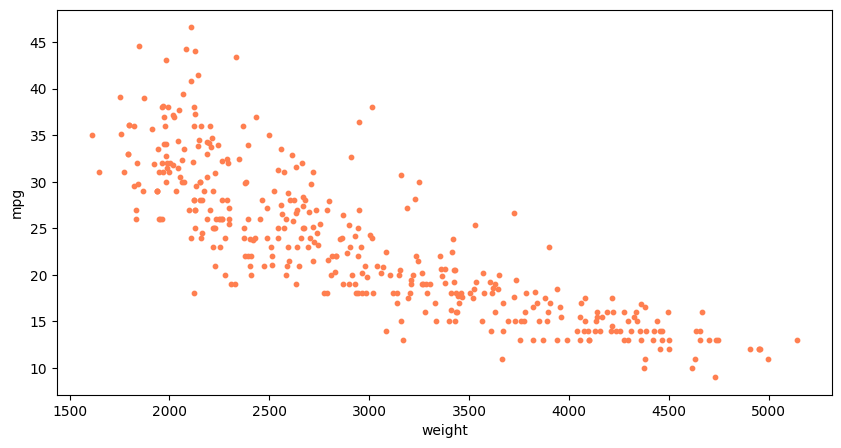

In [11]:
# 종속 변수 Y인 '연비(mpg)'와 다른 변수(무게) 간의 선형관계를 그래프(산점도)로 확인
# Matplotlib으로 산점도 그리기
ndf.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10, 5))
plt.show()
plt.close()

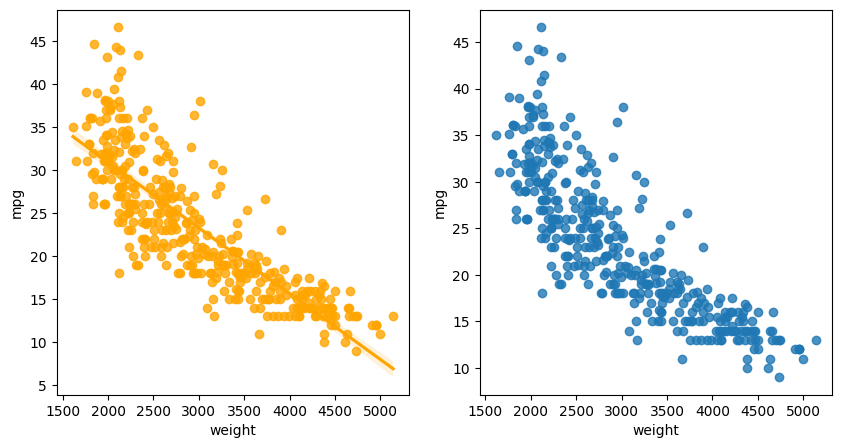

In [12]:
# seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='weight', y='mpg', color='orange', data=ndf, ax=ax1)  # 회귀선 표시
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False)   # 회귀선 미표시
plt.show()
plt.close()

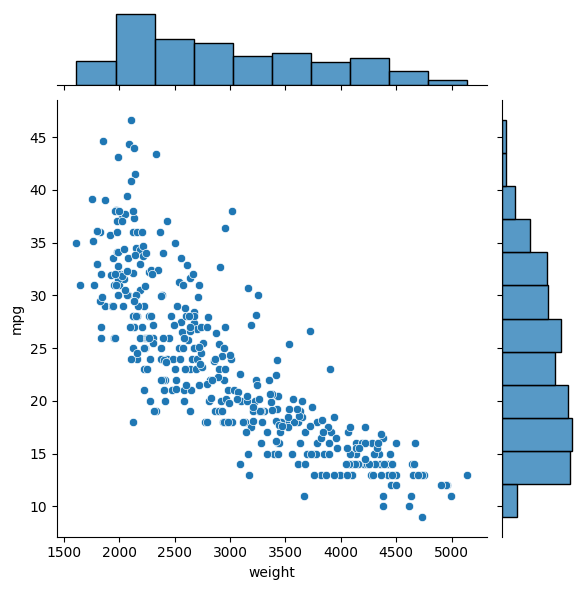

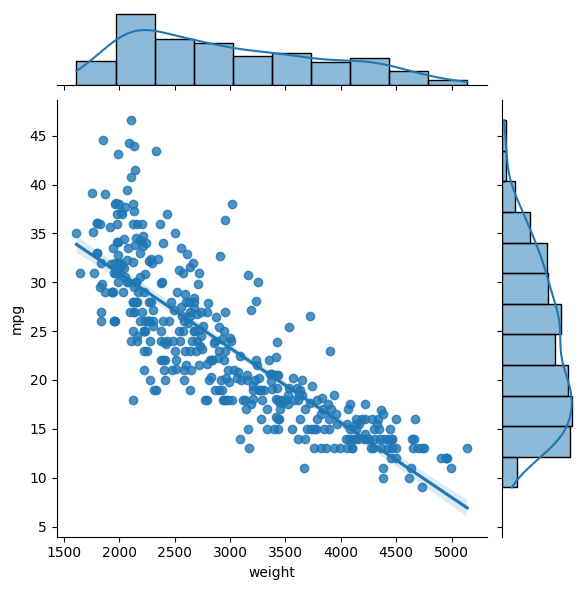

In [13]:
# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='weight', y='mpg', data=ndf)
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf)
plt.show()
plt.close()

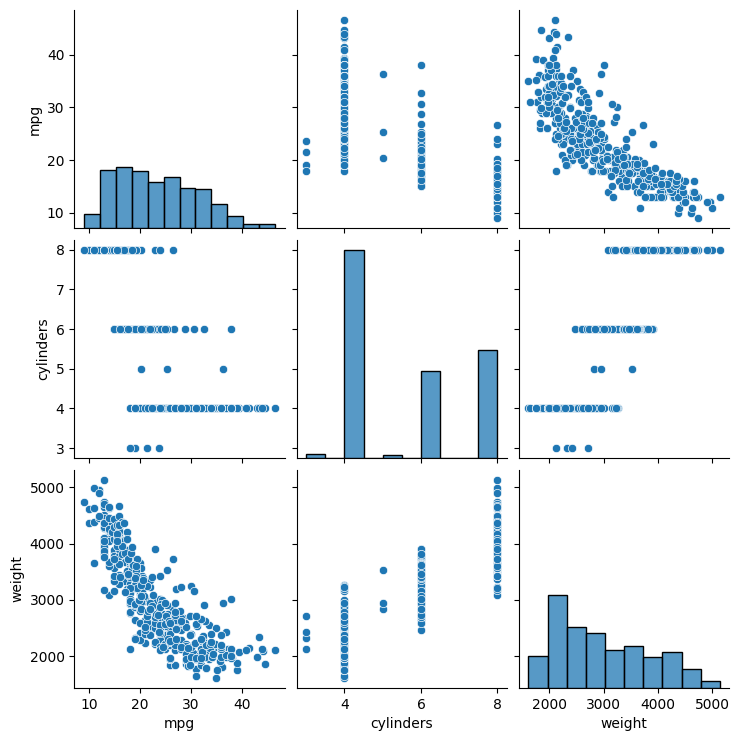

In [14]:
# seaborn pairplot으로 두 변수 간의 모든 경우의 수 그리기
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
sns.pairplot(ndf)
plt.show()
plt.close()

## [Step 4] 데이터셋 구분 - 훈련용(train data) / 검증용(test data)

In [15]:
# 속성(변수) 선택
X = ndf[['weight']]
y = ndf[['mpg']]

# train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,              #독립변수
                                                    y,              #종속변수
                                                    test_size=0.3,  #검증 30%
                                                    random_state=10)#랜덤 추출 값
print('X train data 개수: ', len(X_train))
print('X test data 개수: ', len(X_test))
print('y train data 개수: ', len(y_train))
print('y test data 개수: ', len(y_test))

X train data 개수:  274
X test data 개수:  118
y train data 개수:  274
y test data 개수:  118


## [Step 5] 단순회귀분석 모형 - sklearn 사용

In [16]:
# sklearn 라이브러리에서 선형회귀분석 LinearRegression 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

In [17]:
# train data로 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test_data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)
print('\n')

0.6822458558299322




In [18]:
# 회귀식의 기울기
print('기울기 a: ', lr.coef_)
print('\n')

# 회귀식의 y절편
print('y절편 b', lr.intercept_)
print('\n')

기울기 a:  [[-0.00775343]]


y절편 b [46.71036626]




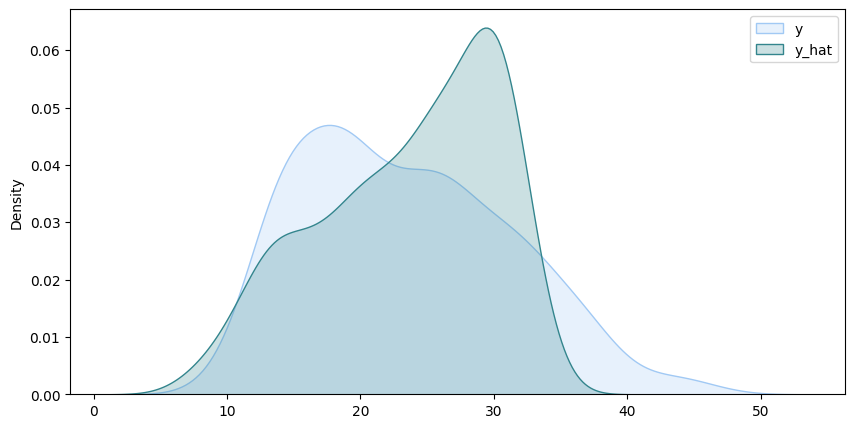

In [34]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
y_hat = lr.predict(X)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, fill=True, palette="pastel", label="y")
ax2 = sns.kdeplot(y_hat, fill=True, palette="crest",label="y_hat", ax=ax1)
plt.legend()
plt.show()
plt.close()

# 다항회귀분석

## [Step 1~4] 데이터 준비
- 단순회귀분석의 4단계까지 동일함

In [36]:
# [Step1] 데이터 준비 - read_csv()

# 열 이름 지정하지 않음(header)
df = pd.read_csv('calculator/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model year', 'origin', 'name']

In [37]:
# [Step2] 데이터 탐색 - info, describe

# 데이터 자료형 확인
print(df.info())
print('\n')

# 데이터 통계 요약정보 확인
pd.set_option('display.max_columns', 10)
print(df.describe())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000 

In [38]:
# horsepower 열의 자료형 변경(문자열 -> 숫자)
print(df['horsepower'].unique())    # hoserpower 열의 고유값 확인 == 중간에 '?' 데이터 있음 확인
print('\n')

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']




In [39]:
df['horsepower'].replace('?', np.nan, inplace=True)     # '?' 값을 nan으로 변경하고, 원본에 덮어씌움(True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)  # 누락데이터 행을 삭제
df['hoserpower'] = df['horsepower'].astype('float')     # 문자열을 실수형으로 변환

print(df.describe())
print('\n')

              mpg   cylinders  displacement       weight  acceleration  \
count  392.000000  392.000000    392.000000   392.000000    392.000000   
mean    23.445918    5.471939    194.411990  2977.584184     15.541327   
std      7.805007    1.705783    104.644004   849.402560      2.758864   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.000000    4.000000    105.000000  2225.250000     13.775000   
50%     22.750000    4.000000    151.000000  2803.500000     15.500000   
75%     29.000000    8.000000    275.750000  3614.750000     17.025000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year      origin  hoserpower  
count  392.000000  392.000000  392.000000  
mean    75.979592    1.576531  104.469388  
std      3.683737    0.805518   38.491160  
min     70.000000    1.000000   46.000000  
25%     73.000000    1.000000   75.000000  
50%     76.000000    1.000000   93.500000  
75%     79.000000    2.00

In [40]:
# 분석에 활용할 열(속성)을 선택(연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

In [41]:
# 속성(변수) 선택
X = ndf[['weight']]
y = ndf[['mpg']]

# train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,              #독립변수
                                                    y,              #종속변수
                                                    test_size=0.3,  #검증 30%
                                                    random_state=10)#랜덤 추출 값
print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)

훈련 데이터:  (274, 1)
검증 데이터:  (118, 1)


## [Step 5] 비선형회귀분석 모형 - sklearn 사용

In [45]:
from sklearn.linear_model import LinearRegression     # 선형회귀분석
from sklearn.preprocessing import PolynomialFeatures # 다항식 변환

In [48]:
# 다항식 변환
poly = PolynomialFeatures(degree=2)        # 2차다항 적용, 변수의 거듭제곱을 새로운 변수로 추가
# 각 변수(X) 값들을 제곱하여(degree=2), 새로운 변수를 만들어주는 혁할, 훈련데이터(변수가 2개가 됨)
X_train_poly = poly.fit_transform(X_train)

print('원 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)

원 데이터:  (274, 1)
2차항 변환 데이터:  (274, 3)


In [49]:
# train data로 모형 학습
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

LinearRegression()

In [53]:
# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
X_test_poly = poly.fit_transform(X_test)   # X_test 데이터를 2차항으로 변형
r_square = pr.score(X_test_poly, y_test)
print(r_square)
print('\n')

0.708700926297548




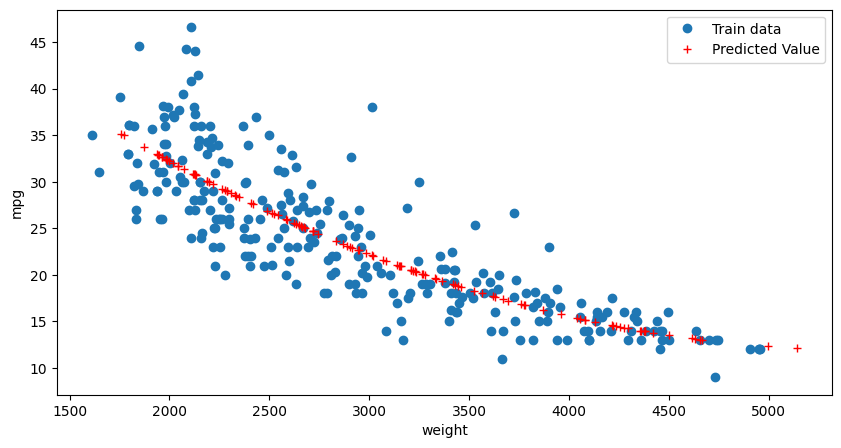

In [56]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train data')          # 데이터 분포
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value')  # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

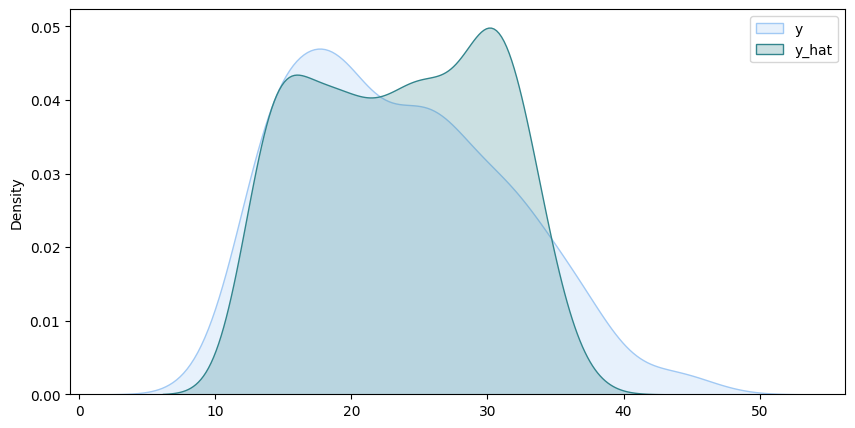

In [61]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
X_poly = poly.fit_transform(X)
y_hat = pr.predict(X_poly)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, fill=True, palette='pastel',label='y')
ax2 = sns.kdeplot(y_hat, fill=True, palette='crest', label='y_hat', ax=ax1)
plt.legend()
plt.show()

## 실제 답 y와 예측 답 y_hat과의 차이가 이전에 비해 줄은 모습